# Exploratory Data Analysis

This notebook provides a starter analysis of financial data, including account states, transactions, and payments. It demonstrates how to load the input data and plots distributions for the population as well as time series for individual agents. This notebook does not do EDA on the labels. That is left up to you.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotting import (
    plot_merchant_type_distribution,
    plot_transaction_amount_distribution,
    plot_event_distribution,
    plot_behavior_over_time,
    display_table_info
)

In [17]:
# Load data
account_state_log = pd.read_csv('../synthcc_train_set/account_state_log.csv')
transactions_log = pd.read_csv('../synthcc_train_set/transactions_log.csv', parse_dates=['timestamp'])
payments_log = pd.read_csv('../synthcc_train_set/payments_log.csv', parse_dates=['timestamp'])
labels = pd.read_csv('../synthcc_train_set/labels.csv')

In [18]:
account_state_log.head()

,agent_id,credit_balance,credit_utilization,interest_rate,min_payment_factor,current_missed_payments,timestamp
0,839,367.017294,0.367,0.191914,0.05,0,2023-01-01
1,179,638.371473,0.638,0.191758,0.05,0,2023-01-01
2,645,652.219191,0.326,0.235719,0.05,0,2023-01-01
3,170,777.674485,0.078,0.234455,0.05,0,2023-01-01
4,152,634.101608,0.317,0.247455,0.05,0,2023-01-01


In [19]:
# Display information for each table
display_table_info(account_state_log, 'account_state_log')
display_table_info(transactions_log, 'transactions_log')
display_table_info(payments_log, 'payments_log')

Schema and attributes of account_state_log:
   agent_id  credit_balance  credit_utilization  interest_rate  \
0       839      367.017294               0.367       0.191914   
1       179      638.371473               0.638       0.191758   
2       645      652.219191               0.326       0.235719   
3       170      777.674485               0.078       0.234455   
4       152      634.101608               0.317       0.247455   

   min_payment_factor  current_missed_payments   timestamp  
0                0.05                        0  2023-01-01  
1                0.05                        0  2023-01-01  
2                0.05                        0  2023-01-01  
3                0.05                        0  2023-01-01  
4                0.05                        0  2023-01-01   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373225 entries, 0 to 373224
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------               

# Population Level Analysis

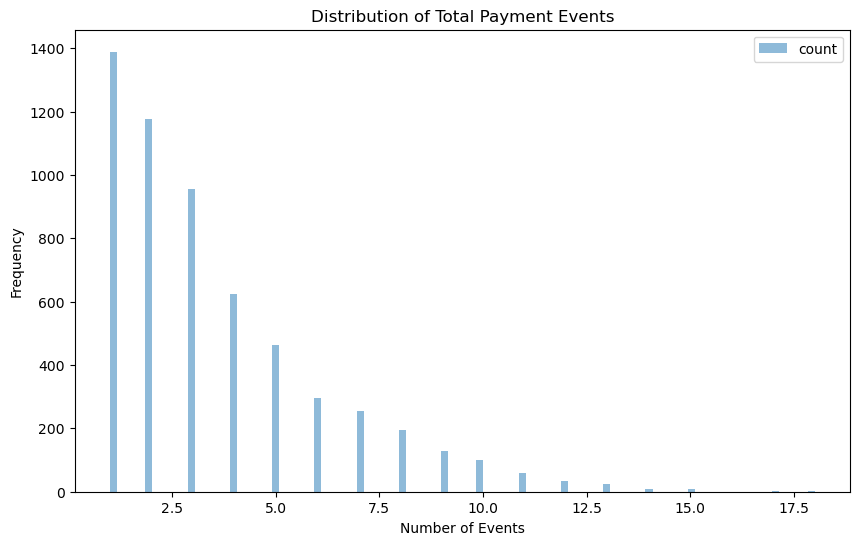

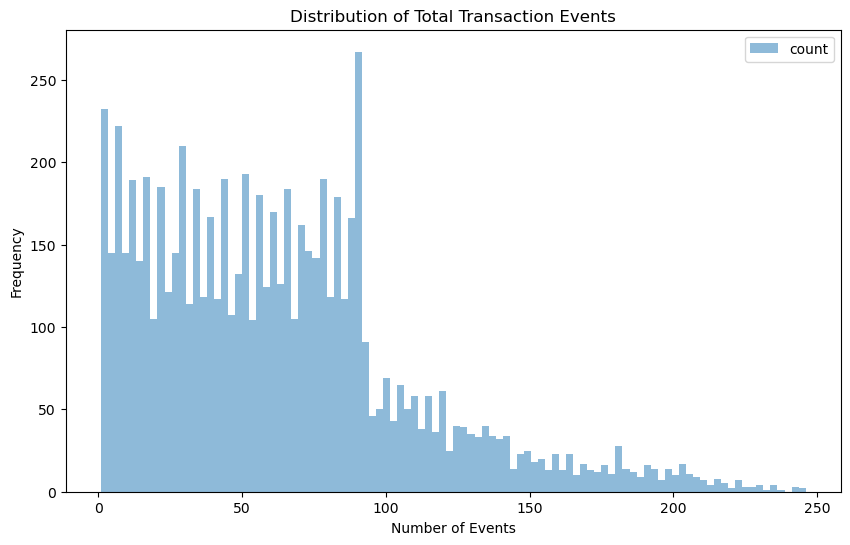

In [20]:
plot_event_distribution(payments_log, 'agent_id', 'Distribution of Total Payment Events', 'Number of Events')
plot_event_distribution(transactions_log, 'agent_id', 'Distribution of Total Transaction Events', 'Number of Events')

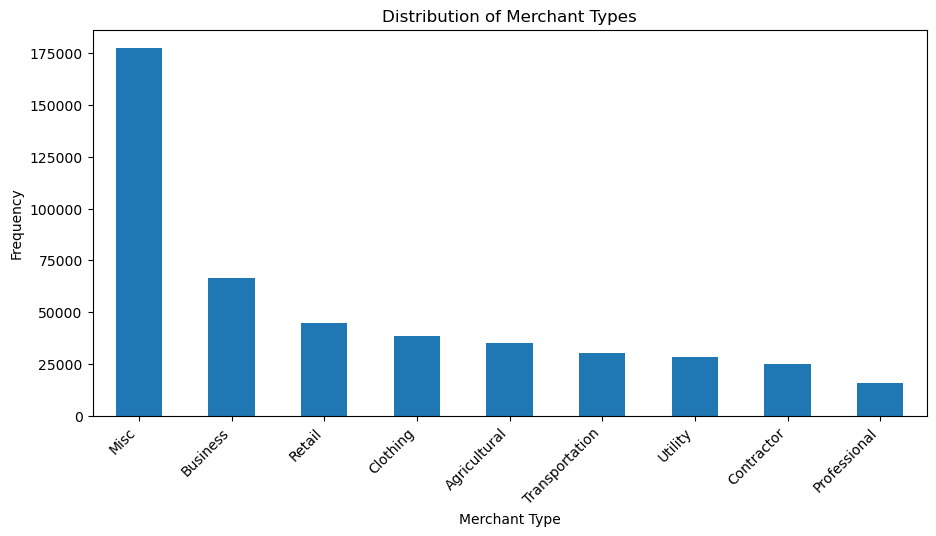

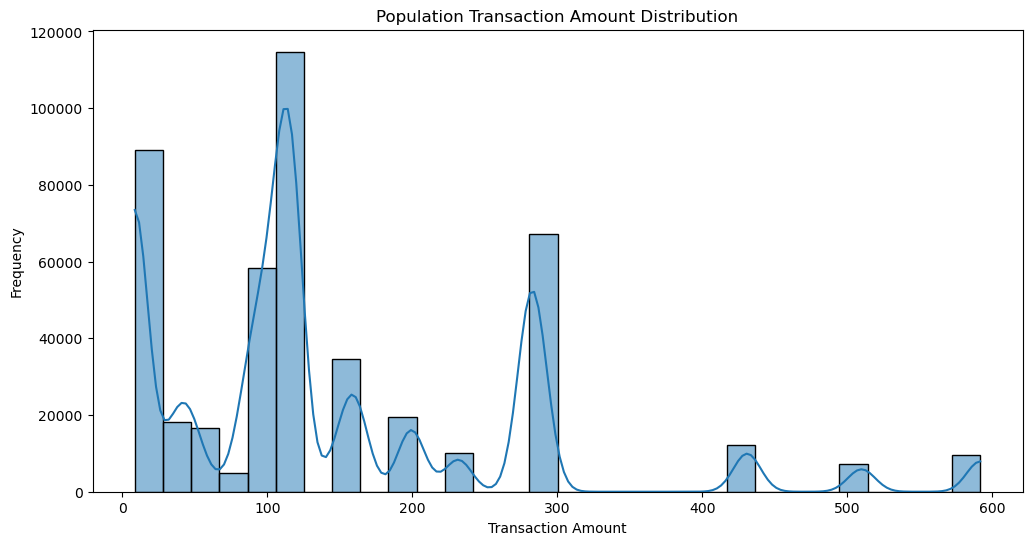

In [21]:
plot_merchant_type_distribution(transactions_log)
plot_transaction_amount_distribution(transactions_log)

Note in the following plots that different agents have time series that start at different points. This corresponds to credit cards opening at different times.

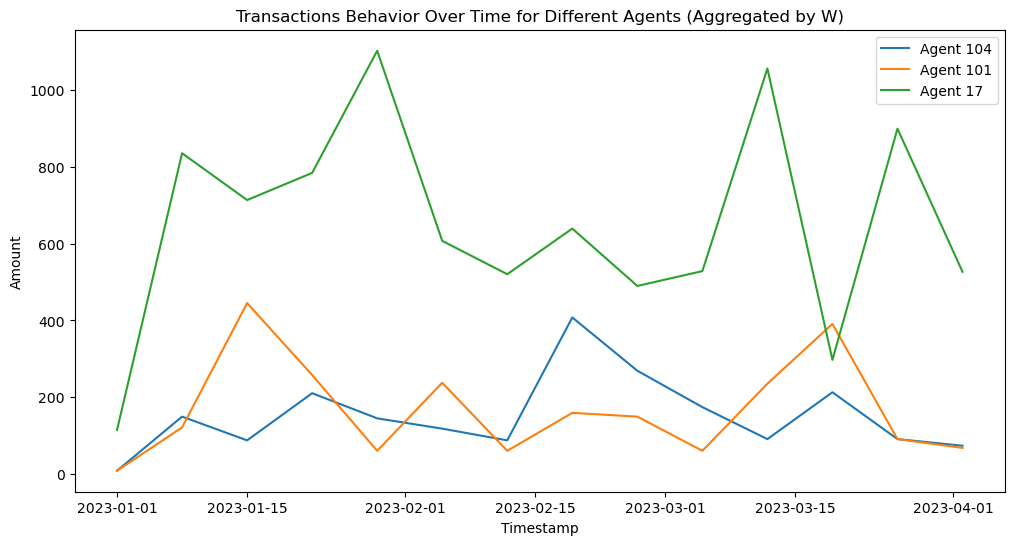

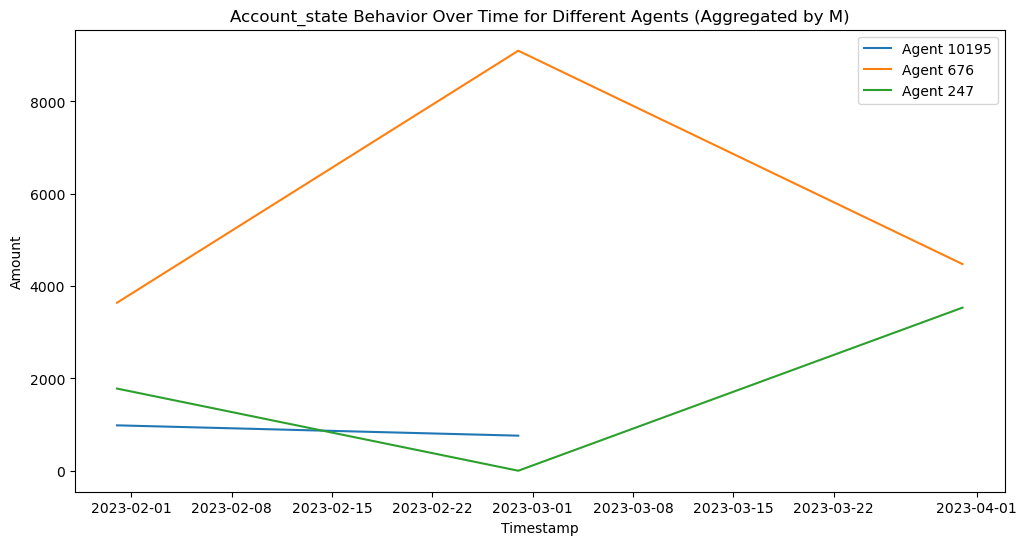

In [22]:
plot_behavior_over_time(transactions_log, agent_ids= [17, 101, 104, 105], sample_size=3, period='W', data_type='transactions')  # For transactions
plot_behavior_over_time(payments_log, sample_size=3, period='M', data_type='account_state')  # For payments

In [23]:
account_state_log[account_state_log["agent_id"] == 17]

,agent_id,credit_balance,credit_utilization,interest_rate,min_payment_factor,current_missed_payments,timestamp
559,17,608.863591,0.122,0.163933,0.05,0,2023-01-01
1405,17,840.603591,0.168,0.188933,0.05,0,2023-01-02
2335,17,922.033591,0.184,0.188933,0.05,0,2023-01-03
3095,17,1040.263591,0.208,0.188933,0.05,0,2023-01-04
4533,17,1121.693591,0.224,0.188933,0.05,0,2023-01-05
...,...,...,...,...,...,...,...
338458,17,3208.193591,0.642,0.188933,0.05,0,2023-03-28
345772,17,3326.423591,0.665,0.188933,0.05,0,2023-03-29
356574,17,3415.593591,0.683,0.188933,0.05,0,2023-03-30
362097,17,3504.743591,0.701,0.188933,0.05,0,2023-03-31


In [9]:
payments_log[payments_log["agent_id"] == 17]

,agent_id,amount,timestamp
4586,17,4680.12,2023-02-07 01:43:55
5271,17,270.86,2023-02-10 02:08:20
6368,17,545.42,2023-02-15 03:16:11
7677,17,509.62,2023-02-21 03:33:54
8338,17,95.44,2023-02-23 07:47:59


In [ ]:
transactions_log[transactions_log["agent_id"] == 17]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Aggregate metrics for each agent
aggregated_data = account_state_log.groupby('agent_id').agg({
    'credit_utilization': 'mean',
    'current_missed_payments': 'sum'
}).reset_index()

# Calculate average transaction and payment amounts per month and year
transactions_log['month'] = transactions_log['timestamp'].dt.to_period('M')
payments_log['month'] = payments_log['timestamp'].dt.to_period('M')

avg_transaction_per_month = transactions_log.groupby(['agent_id', 'month'])['amount'].mean().groupby('agent_id').mean().reset_index(name='avg_transaction_per_month')
avg_payment_per_month = payments_log.groupby(['agent_id', 'month'])['amount'].mean().groupby('agent_id').mean().reset_index(name='avg_payment_per_month')

avg_transaction_per_year = transactions_log.groupby(['agent_id', transactions_log['timestamp'].dt.year])['amount'].mean().groupby('agent_id').mean().reset_index(name='avg_transaction_per_year')
avg_payment_per_year = payments_log.groupby(['agent_id', payments_log['timestamp'].dt.year])['amount'].mean().groupby('agent_id').mean().reset_index(name='avg_payment_per_year')

# Merge aggregated data
aggregated_data = aggregated_data.merge(avg_transaction_per_month, on='agent_id', how='left')
aggregated_data = aggregated_data.merge(avg_payment_per_month, on='agent_id', how='left')
aggregated_data = aggregated_data.merge(avg_transaction_per_year, on='agent_id', how='left')
aggregated_data = aggregated_data.merge(avg_payment_per_year, on='agent_id', how='left')
aggregated_data = aggregated_data.merge(labels, on='agent_id', how='left')
# Create a target variable for credit charge-offs (assuming charge-off is defined by current_missed_payments > 0)


# Define features and target
X = aggregated_data.drop(columns=['agent_id', 'charge_off_within_3_months', 'charge_off_within_6_months', 'charge_off_within_9_months', 'charge_off_within_12_months'])
y_3 = aggregated_data['charge_off_within_3_months']
y_6 = aggregated_data['charge_off_within_6_months']
y_9 = aggregated_data['charge_off_within_9_months']
y_12 = aggregated_data['charge_off_within_12_months']

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_3, test_size=0.2, random_state=42)

# # Train a random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# # Make predictions
y_pred = rf_model.predict(X_test)

# # Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

joblib.dump(rf_model, 'rf_model_3.joblib')


X_train, X_test, y_train, y_test = train_test_split(X, y_6, test_size=0.2, random_state=42)

# # Train a random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# # Make predictions
y_pred = rf_model.predict(X_test)

# # Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

joblib.dump(rf_model, 'rf_model_6.joblib')

X_train, X_test, y_train, y_test = train_test_split(X, y_9, test_size=0.2, random_state=42)

# # Train a random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# # Make predictions
y_pred = rf_model.predict(X_test)

# # Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

joblib.dump(rf_model, 'rf_model_9.joblib')

X_train, X_test, y_train, y_test = train_test_split(X, y_12, test_size=0.2, random_state=42)

# # Train a random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# # Make predictions
y_pred = rf_model.predict(X_test)

# # Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

joblib.dump(rf_model, 'rf_model_12.joblib')

(7352, 11)
Accuracy: 0.9993201903467029
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1470
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1471
   macro avg       0.50      0.50      0.50      1471
weighted avg       1.00      1.00      1.00      1471



/Users/yashaswi/anaconda3/envs/stub-env-synthcc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yashaswi/anaconda3/envs/stub-env-synthcc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yashaswi/anaconda3/envs/stub-env-synthcc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Accuracy: 0.9925220938137321
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1460
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1471
   macro avg       0.50      0.50      0.50      1471
weighted avg       0.99      0.99      0.99      1471



/Users/yashaswi/anaconda3/envs/stub-env-synthcc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yashaswi/anaconda3/envs/stub-env-synthcc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yashaswi/anaconda3/envs/stub-env-synthcc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Accuracy: 0.9843643779741672
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1449
           1       0.00      0.00      0.00        22

    accuracy                           0.98      1471
   macro avg       0.49      0.50      0.50      1471
weighted avg       0.97      0.98      0.98      1471

Accuracy: 0.9775662814411965
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1438
           1       0.00      0.00      0.00        33

    accuracy                           0.98      1471
   macro avg       0.49      0.50      0.49      1471
weighted avg       0.96      0.98      0.97      1471



/Users/yashaswi/anaconda3/envs/stub-env-synthcc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yashaswi/anaconda3/envs/stub-env-synthcc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yashaswi/anaconda3/envs/stub-env-synthcc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

['rf_model_12.joblib']